In [ ]:
#Importing the necessary modules.
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#Reading the video file
#1) Read the video and extract individual frames using OpenCV. [15]
cap=cv2.VideoCapture("object_tracking.mp4")

In [ ]:
#cap=cv2.VideoCapture("object_tracking.mp4")
#2) Loop over each frame to extract the pixels of moving object (Hint: Use color). [20]
ret,frame=cap.read()
centroids = []
#Looping over the movie object
while ret==True:
    #print(ret)
    #Reading each fame
    gImg=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    #print(np.where(gImg==0)[0].size)
    #Generating the centroid for each frame
    if(np.where(gImg==0)[0].size != 0 or np.where(gImg==0)[1].size != 0):
      array_y, array_x = np.where(gImg==0)
      x_min, x_max = np.amin(array_x),np.amax(array_x)
      y_min, y_max = np.amin(array_y),np.amax(array_y)
      #Centroid being calculated
      #3) Calculate the centroid of the object in every frame (doesn’t have to be very precise). [15]
      centroids.append(((x_min+x_max)/2,(y_min+y_max)/2))
    ret,frame=cap.read()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(centroids[0],centroids[len(centroids)//2],centroids[len(centroids)-1])

(6.5, 1010.0) (1007.0, 402.5) (1895.0, 1056.0)


In [ ]:
array_points = np.array(centroids,dtype=np.int32)
print(array_points)

[[   6 1010]
 [   6 1010]
 [   6 1010]
 ...
 [1893 1056]
 [1895 1056]
 [1895 1056]]


In [ ]:
x,y = np.unravel_index(np.argmin(array_points),array_points.shape)
print(np.min(array_points, axis=(0)))
print(np.max(array_points, axis=(0)))

[  6 401]
[1895 1057]


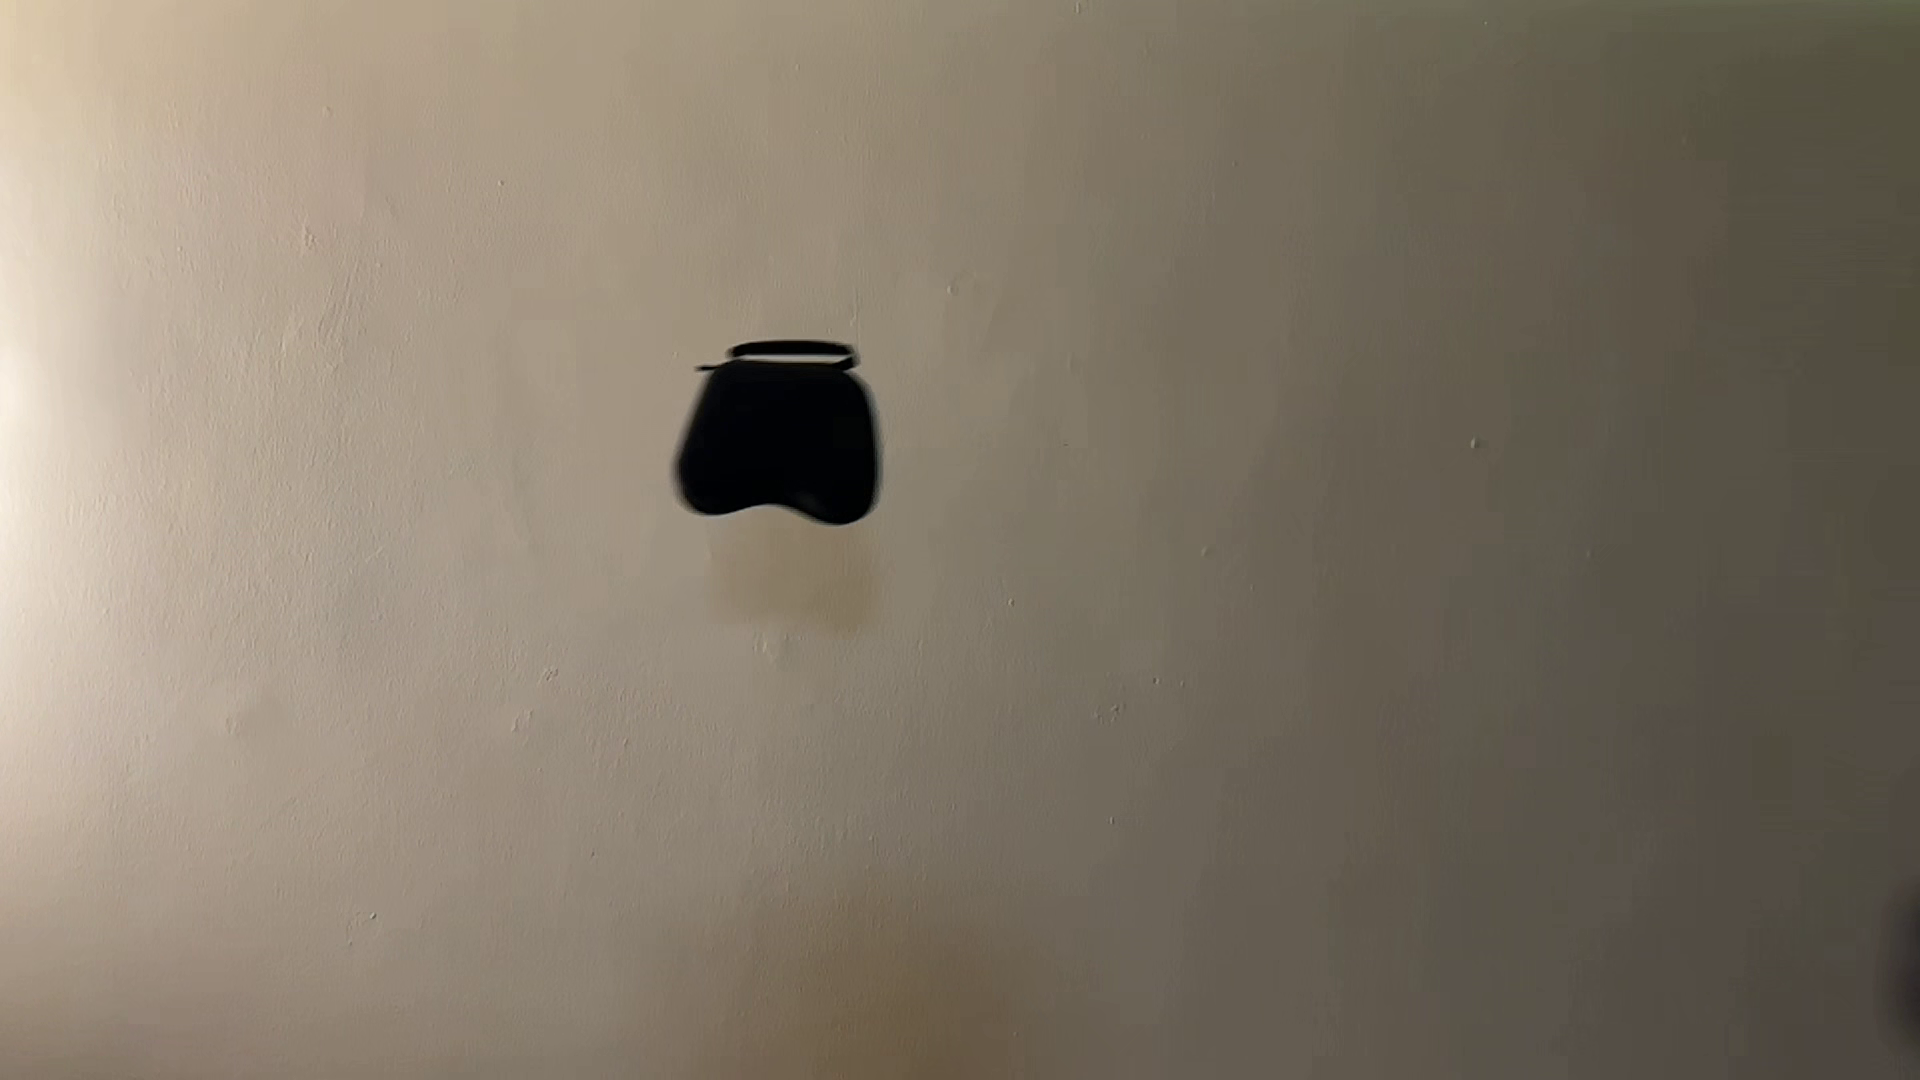

In [ ]:
cap.set(1, 420)
ret, polyFrame = cap.read()
cv2.imshow("",polyFrame)

In [ ]:
# Using the equation y = ax2+bx+c
# My equations will be 1010 = a(6.5)2 + b(6.5) + c, 402.5 = a(1007)2 + b(1007) + c, 1056= a(1895)2 + b(1895) + c
# From above equations we can get A matrix,X matrix and B matrix.
#4) Assume TOP LEFT corner of the frame as 0,0 and accordingly use ‘Standard Least Square’ to fit a curve (parabola)
#through the found centroids in part 3. [20]

A = np.array([[6.5**2, 6.5, 1],
              [1007**2, 1007, 1],
              [1895**2, 1895, 1]])
At = A.transpose()

B = np.array([[1010],[402.5],[1056]])

ATA = np.matmul(At,A)

invATA = np.linalg.inv(ATA)

invATAAt = np.matmul(invATA,At)

invATAAtB = np.matmul(invATAAt,B)

print(invATAAtB)


[[ 7.11209862e-04]
 [-1.32800760e+00]
 [ 1.01860200e+03]]


In [ ]:
#5) Given that x axis value is 1000, find the y axis value for calculated equation in part 4. [10]
x = np.array([np.square(1000),1000,1])
y = np.matmul(x, invATAAtB)
print("Value of y when x is 1000 is: ", y)

Value of y when x is 1000 is:  [401.80426582]


In [ ]:
x_coords = list(range(6,1895,1))
one_arr = [1]*len(x_coords)
x_arr = np.array([np.square(x_coords),x_coords,one_arr])
print(x_arr.transpose())

[[     36       6       1]
 [     49       7       1]
 [     64       8       1]
 ...
 [3579664    1892       1]
 [3583449    1893       1]
 [3587236    1894       1]]


In [ ]:
y_coords = np.matmul(x_arr.transpose(),invATAAtB)
y_coords

array([[1010.65955874],
       [1009.34079687],
       [1008.02345742],
       ...,
       [1051.90396754],
       [1053.26788928],
       [1054.63323343]])

In [ ]:
x_coords = np.array(x_coords)
x_coords = x_coords.reshape((-1,1))
x_coords.shape

(1889, 1)

In [ ]:
coords = np.array([x_coords,y_coords])
coords = coords.transpose()

In [ ]:
coords = coords.astype(np.int32)

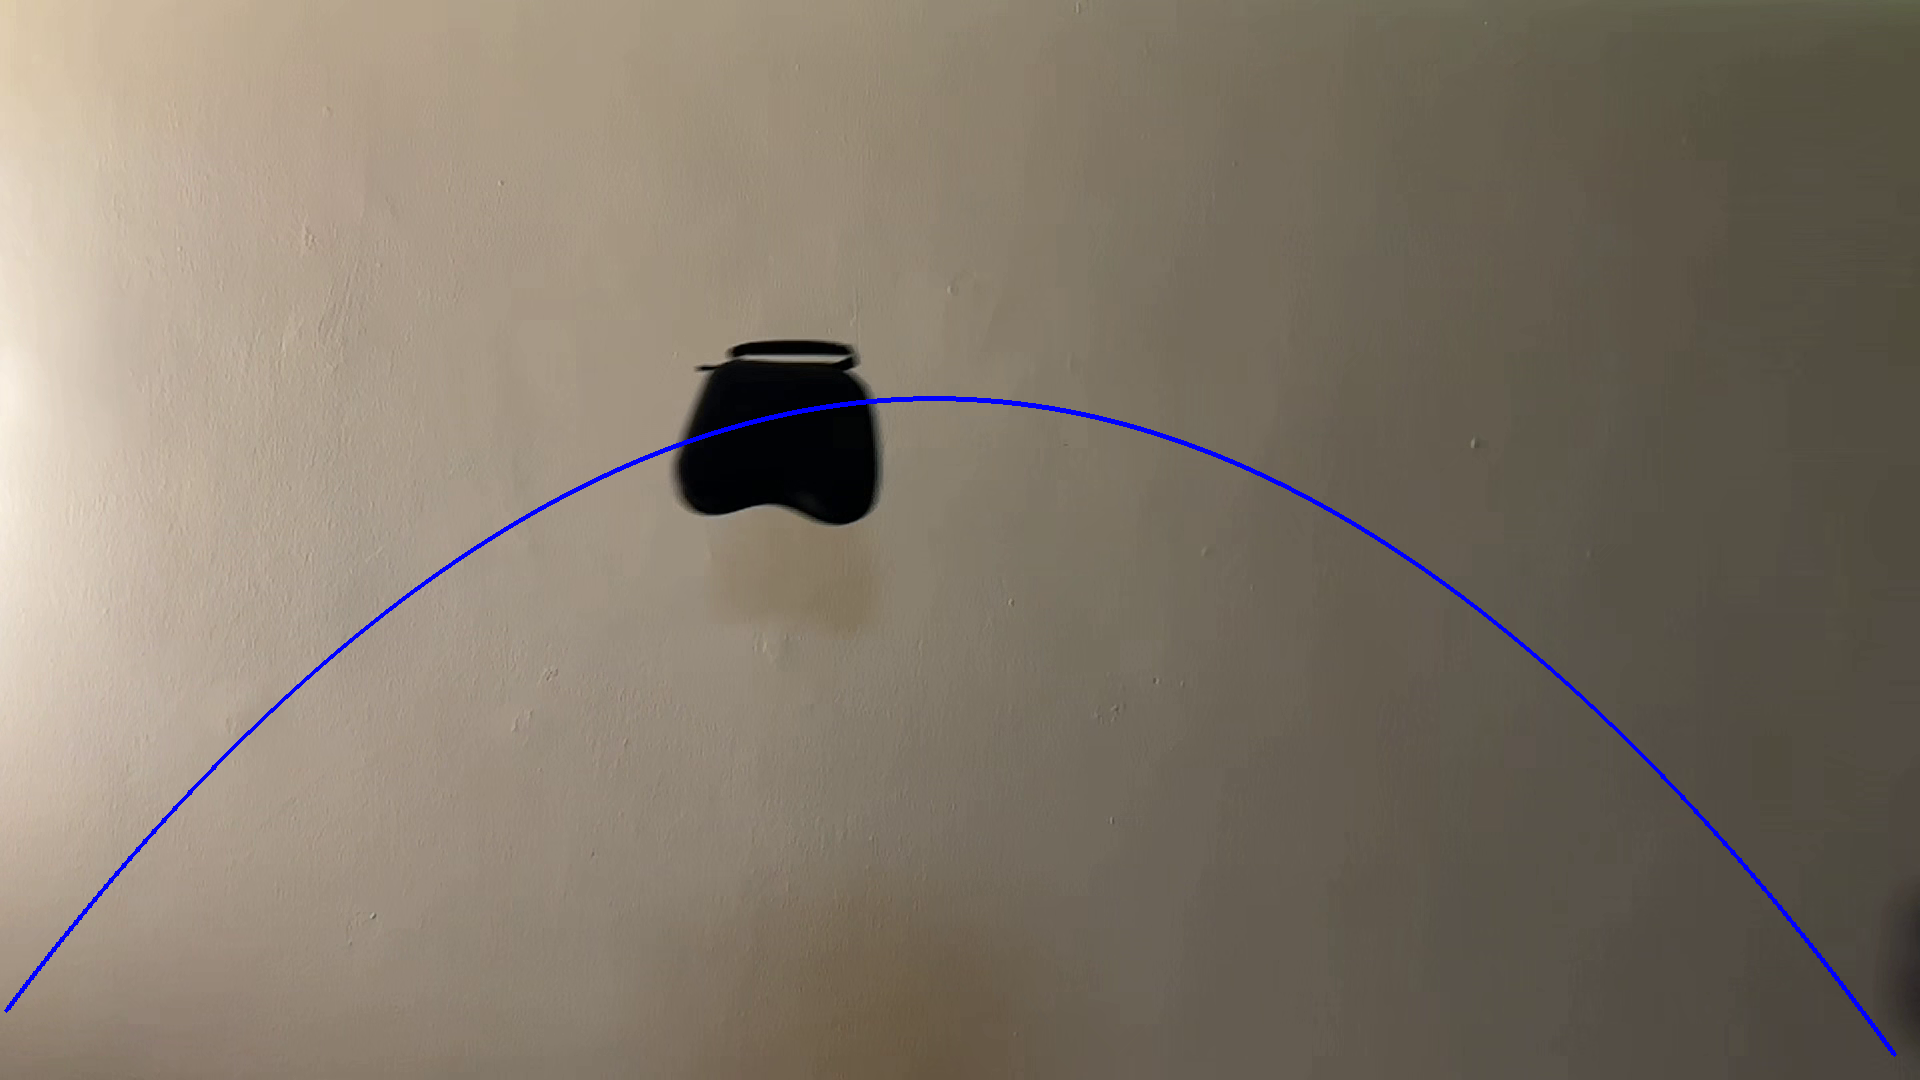

In [ ]:
#6) Capture any one frame from the video (which shows the object) and plot the obtained equation. [20]
cv2.polylines(polyFrame,[coords], False, (255,0,0), 3)
cv2.imshow("",polyFrame)